<div style="text-align: center; margin: 50px">
<h1 style="color: darkblue; text-align: center;">Implementación de máquinas de aprendizaje
para la reducción de falsos positivos de hiper-intensidades presentes en la materia blanca del cerebro</h1>
</div>



<div style="text-align: center; margin: 50px">
<h1>Miguel de Jesús Martínez Felipe</h1>
<h1>Jesús Alberto Martínez Castro</h1>
</div>



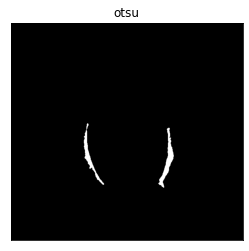

[INFO] examining component 1/3 (background)
[INFO] examining component 2/3
[INFO] examining component 3/3


233

In [35]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from matplotlib import pyplot as plt


######################################
######################################
# Se leen las imagenes de Lesion 
######################################
######################################
pathFiles='/home/miguel/Descargas/Proyecto Innovacion/Imagenes/IMAGENES LESIONES/ENTRENAMIENTO LESION'
onlyfiles = [ f for f in listdir(pathFiles) if isfile(join(pathFiles,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
#     print(join(pathFiles,onlyfiles[n]))
    images[n] = cv2.imread( join(pathFiles,onlyfiles[n]) )

######################################
######################################
# Se Binariza la imagen 
######################################
######################################
grayImage = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(grayImage,0,255,cv2.THRESH_BINARY)
plt.subplot(1,1,1),plt.imshow(thresh1,'gray')
plt.title('otsu')
plt.xticks([]),plt.yticks([])
plt.show()
# ret,thresh1 = cv2.threshold(images[0], 0, 255,cv2.THRESH_OTSU)
######################################
######################################
# Se etiqueta la imagen 
######################################
######################################
connectivity = 4  

output = cv2.connectedComponentsWithStats(thresh1, connectivity, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output


# loop over the number of unique connected component labels
for i in range(0, numLabels):
    # if this is the first component then we examine the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

output = images[0].copy()
cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

componentMask = (labels == i).astype("uint8") * 255
# show our output image and connected component mask
cv2.imshow("Output", output)
cv2.imshow("Connected Component", componentMask)
cv2.waitKey(0)